In [1]:
#Problem Statement: Monitoring the temperature maintaining system(IoT) and drawing a conclusion wrt temperature

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Loading the datatframe
data = pd.read_csv(r'C:\Users\anuka\Desktop\Lab_monitor.csv')

In [6]:
data

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,8/12/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,8/12/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,8/12/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,8/12/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,8/12/2018 9:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [7]:
#using regular expression decoding the id to numericals
import re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
data['id']=data['id'].apply(lambda x: find_number(x))

In [8]:
data

,id,room_id/id,noted_date,temp,out/in
0,196134 201015,Room Admin,8/12/2018 9:30,29,In
1,196131 7 51,Room Admin,8/12/2018 9:30,29,In
2,196127 522915 3,Room Admin,8/12/2018 9:29,41,Out
3,196128 0919,Room Admin,8/12/2018 9:29,41,Out
4,196126 30 72,Room Admin,8/12/2018 9:29,31,In
...,...,...,...,...,...
97601,91076 7 08,Room Admin,28-07-2018 07:07,31,In
97602,147733 62 03 31,Room Admin,28-07-2018 07:07,31,In
97603,100386 84093 68,Room Admin,28-07-2018 07:06,31,In
97604,123297 4 8 690,Room Admin,28-07-2018 07:06,31,In


In [9]:
#using again regex to get the unique id embedded in Id

In [10]:
data['id'] = data['id'].str.extract('(\d+)(?=\s)')
data

,id,room_id/id,noted_date,temp,out/in
0,196134,Room Admin,8/12/2018 9:30,29,In
1,196131,Room Admin,8/12/2018 9:30,29,In
2,196127,Room Admin,8/12/2018 9:29,41,Out
3,196128,Room Admin,8/12/2018 9:29,41,Out
4,196126,Room Admin,8/12/2018 9:29,31,In
...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In
97602,147733,Room Admin,28-07-2018 07:07,31,In
97603,100386,Room Admin,28-07-2018 07:06,31,In
97604,123297,Room Admin,28-07-2018 07:06,31,In


In [11]:
#with the noted date in the data frame getting month day date separately
data['month'] = pd.DatetimeIndex(data['noted_date']).month
data['date'] = pd.to_datetime(data['noted_date'])

data['day_of_week'] = data['date'].dt.day_name()

In [12]:
data

,id,room_id/id,noted_date,temp,out/in,month,date,day_of_week
0,196134,Room Admin,8/12/2018 9:30,29,In,8,2018-08-12 09:30:00,Sunday
1,196131,Room Admin,8/12/2018 9:30,29,In,8,2018-08-12 09:30:00,Sunday
2,196127,Room Admin,8/12/2018 9:29,41,Out,8,2018-08-12 09:29:00,Sunday
3,196128,Room Admin,8/12/2018 9:29,41,Out,8,2018-08-12 09:29:00,Sunday
4,196126,Room Admin,8/12/2018 9:29,31,In,8,2018-08-12 09:29:00,Sunday
...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,7,2018-07-28 07:07:00,Saturday
97602,147733,Room Admin,28-07-2018 07:07,31,In,7,2018-07-28 07:07:00,Saturday
97603,100386,Room Admin,28-07-2018 07:06,31,In,7,2018-07-28 07:06:00,Saturday
97604,123297,Room Admin,28-07-2018 07:06,31,In,7,2018-07-28 07:06:00,Saturday


In [13]:
data['hour'] = pd.to_datetime(data['noted_date']).dt.hour
data['month'] = data['date'].dt.month_name()


In [14]:
#knowing the season according to the date provided
data['month'] = pd.DatetimeIndex(data['date']).month
months = [1,2,3,4,5,6,7,8,9,10,11,12]
df = pd.DataFrame(data=months, columns=['Month'])
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Monsoon', 10:'Monsoon', 11:'Monsoon'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Summer', 4:'Summer', 5:'Summer',
            6:'Monsoon', 7:'Monsoon', 8:'Monsoon',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

In [15]:
season_list = []
hemisphere = 'Northern'
for month in data['month']:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
data['Season'] = season_list

In [16]:
data

,id,room_id/id,noted_date,temp,out/in,month,date,day_of_week,hour,Season
0,196134,Room Admin,8/12/2018 9:30,29,In,8,2018-08-12 09:30:00,Sunday,9,Monsoon
1,196131,Room Admin,8/12/2018 9:30,29,In,8,2018-08-12 09:30:00,Sunday,9,Monsoon
2,196127,Room Admin,8/12/2018 9:29,41,Out,8,2018-08-12 09:29:00,Sunday,9,Monsoon
3,196128,Room Admin,8/12/2018 9:29,41,Out,8,2018-08-12 09:29:00,Sunday,9,Monsoon
4,196126,Room Admin,8/12/2018 9:29,31,In,8,2018-08-12 09:29:00,Sunday,9,Monsoon
...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,7,2018-07-28 07:07:00,Saturday,7,Monsoon
97602,147733,Room Admin,28-07-2018 07:07,31,In,7,2018-07-28 07:07:00,Saturday,7,Monsoon
97603,100386,Room Admin,28-07-2018 07:06,31,In,7,2018-07-28 07:06:00,Saturday,7,Monsoon
97604,123297,Room Admin,28-07-2018 07:06,31,In,7,2018-07-28 07:06:00,Saturday,7,Monsoon


In [17]:
#knowing the part of the day
data['timestamp'] = pd.to_datetime(data['date'])

data['time'] = data['timestamp'].dt.time
data['transaction timestamp'] = pd.to_timedelta(data['time'].astype(str))

b = pd.to_timedelta(['00:00:00','12:00:00','16:00:00','20:00:00', '24:00:00'])
l = ['Morning','Afternoon','Evening','Night']
data['time of day'] = pd.cut(data['transaction timestamp'], bins=b, labels=l)


In [18]:
data['Date'] = pd.to_datetime(data['noted_date']).dt.day


In [19]:
#dropping the unwanted data
data_1=data.drop(['date','timestamp','transaction timestamp'],axis=1)

In [20]:
data_1=data.drop(['date','timestamp','transaction timestamp','time'],axis=1)

In [26]:
data_1['month_name'] = data['date'].dt.month_name()

In [27]:
data_1

,id,room_id/id,noted_date,temp,out/in,month,day_of_week,hour,Season,time of day,Date,month_name
0,196134,Room Admin,8/12/2018 9:30,29,In,8,Sunday,9,Monsoon,Morning,12,August
1,196131,Room Admin,8/12/2018 9:30,29,In,8,Sunday,9,Monsoon,Morning,12,August
2,196127,Room Admin,8/12/2018 9:29,41,Out,8,Sunday,9,Monsoon,Morning,12,August
3,196128,Room Admin,8/12/2018 9:29,41,Out,8,Sunday,9,Monsoon,Morning,12,August
4,196126,Room Admin,8/12/2018 9:29,31,In,8,Sunday,9,Monsoon,Morning,12,August
...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,7,Saturday,7,Monsoon,Morning,28,July
97602,147733,Room Admin,28-07-2018 07:07,31,In,7,Saturday,7,Monsoon,Morning,28,July
97603,100386,Room Admin,28-07-2018 07:06,31,In,7,Saturday,7,Monsoon,Morning,28,July
97604,123297,Room Admin,28-07-2018 07:06,31,In,7,Saturday,7,Monsoon,Morning,28,July


In [28]:
#rearranging the columns
data_1.iloc[:,[0,1,2,3,4,5,10,6,7,8,11,9]]

,id,room_id/id,noted_date,temp,out/in,month,Date,day_of_week,hour,Season,month_name,time of day
0,196134,Room Admin,8/12/2018 9:30,29,In,8,12,Sunday,9,Monsoon,August,Morning
1,196131,Room Admin,8/12/2018 9:30,29,In,8,12,Sunday,9,Monsoon,August,Morning
2,196127,Room Admin,8/12/2018 9:29,41,Out,8,12,Sunday,9,Monsoon,August,Morning
3,196128,Room Admin,8/12/2018 9:29,41,Out,8,12,Sunday,9,Monsoon,August,Morning
4,196126,Room Admin,8/12/2018 9:29,31,In,8,12,Sunday,9,Monsoon,August,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,7,28,Saturday,7,Monsoon,July,Morning
97602,147733,Room Admin,28-07-2018 07:07,31,In,7,28,Saturday,7,Monsoon,July,Morning
97603,100386,Room Admin,28-07-2018 07:06,31,In,7,28,Saturday,7,Monsoon,July,Morning
97604,123297,Room Admin,28-07-2018 07:06,31,In,7,28,Saturday,7,Monsoon,July,Morning


<AxesSubplot:xlabel='month_name', ylabel='temp'>

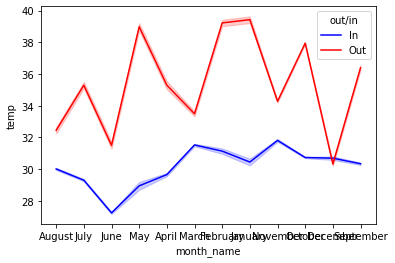

In [29]:
#plotting the data for visualisation
sns.lineplot(x='month_name', 
             y='temp',
             hue='out/in', 
             palette=['b','r'],
             data=data_1)


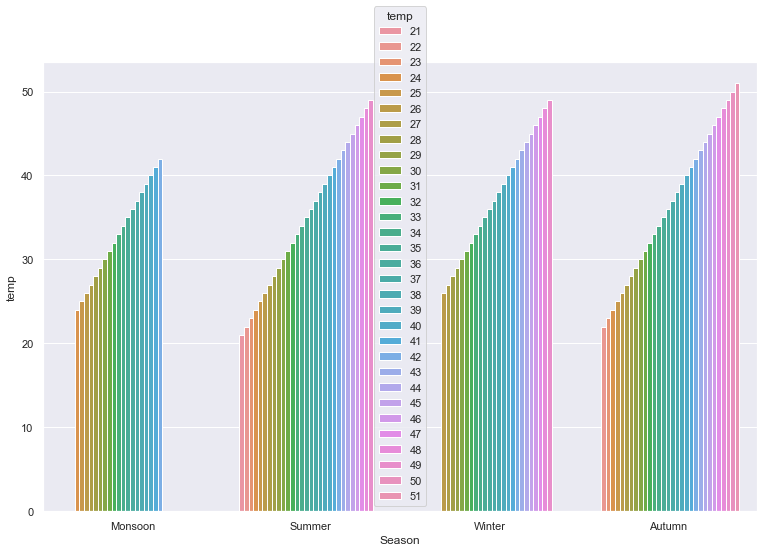

In [32]:
sns.barplot(x = 'Season', y = 'temp', hue = 'temp', data = data_1)
plt.show()
sns.set(rc={'figure.figsize':(25,16)})

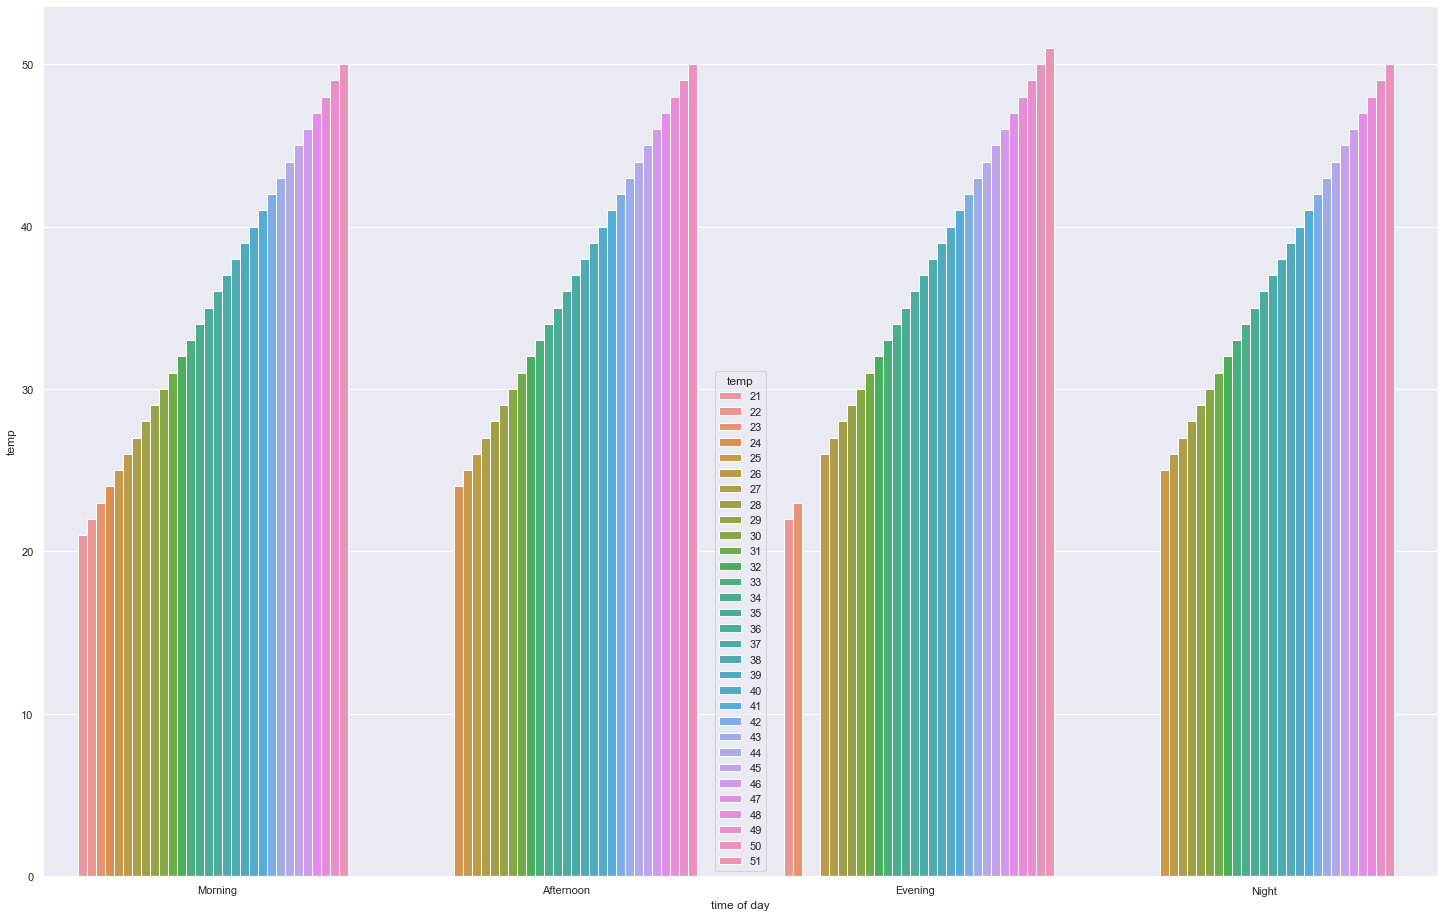

In [33]:
sns.barplot(x = 'time of day', y = 'temp', hue = 'temp', data = data_1)
plt.show()

In [34]:
#converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
data_1['out/in'] = labelencoder.fit_transform(data['out/in']) 

In [35]:
data_1

,id,room_id/id,noted_date,temp,out/in,month,day_of_week,hour,Season,time of day,Date,month_name
0,196134,Room Admin,8/12/2018 9:30,29,0,8,Sunday,9,Monsoon,Morning,12,August
1,196131,Room Admin,8/12/2018 9:30,29,0,8,Sunday,9,Monsoon,Morning,12,August
2,196127,Room Admin,8/12/2018 9:29,41,1,8,Sunday,9,Monsoon,Morning,12,August
3,196128,Room Admin,8/12/2018 9:29,41,1,8,Sunday,9,Monsoon,Morning,12,August
4,196126,Room Admin,8/12/2018 9:29,31,0,8,Sunday,9,Monsoon,Morning,12,August
...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,0,7,Saturday,7,Monsoon,Morning,28,July
97602,147733,Room Admin,28-07-2018 07:07,31,0,7,Saturday,7,Monsoon,Morning,28,July
97603,100386,Room Admin,28-07-2018 07:06,31,0,7,Saturday,7,Monsoon,Morning,28,July
97604,123297,Room Admin,28-07-2018 07:06,31,0,7,Saturday,7,Monsoon,Morning,28,July


In [36]:
#grouping of data
group_in_out = data_1.groupby('out/in')['out/in'].count()

In [37]:
group_in_out

out/in
0    20345
1    77261
Name: out/in, dtype: int64

In [43]:
#Based on in and out segregating the data
data_in = data_1[data_1['out/in']==1]

In [44]:
data_in

,id,room_id/id,noted_date,temp,out/in,month,day_of_week,hour,Season,time of day,Date,month_name
2,196127,Room Admin,8/12/2018 9:29,41,1,8,Sunday,9,Monsoon,Morning,12,August
3,196128,Room Admin,8/12/2018 9:29,41,1,8,Sunday,9,Monsoon,Morning,12,August
10,196108,Room Admin,8/12/2018 9:25,42,1,8,Sunday,9,Monsoon,Morning,12,August
11,196108,Room Admin,8/12/2018 9:25,42,1,8,Sunday,9,Monsoon,Morning,12,August
16,196094,Room Admin,8/12/2018 9:21,41,1,8,Sunday,9,Monsoon,Morning,12,August
...,...,...,...,...,...,...,...,...,...,...,...,...
97587,99990,Room Admin,28-07-2018 07:07,32,1,7,Saturday,7,Monsoon,Morning,28,July
97588,106366,Room Admin,28-07-2018 07:07,32,1,7,Saturday,7,Monsoon,Morning,28,July
97594,128809,Room Admin,28-07-2018 07:07,32,1,7,Saturday,7,Monsoon,Morning,28,July
97596,111718,Room Admin,28-07-2018 07:07,32,1,7,Saturday,7,Monsoon,Morning,28,July


In [45]:
data_out = data_1[data_1['out/in']==0]

In [46]:
data_out

,id,room_id/id,noted_date,temp,out/in,month,day_of_week,hour,Season,time of day,Date,month_name
0,196134,Room Admin,8/12/2018 9:30,29,0,8,Sunday,9,Monsoon,Morning,12,August
1,196131,Room Admin,8/12/2018 9:30,29,0,8,Sunday,9,Monsoon,Morning,12,August
4,196126,Room Admin,8/12/2018 9:29,31,0,8,Sunday,9,Monsoon,Morning,12,August
5,196125,Room Admin,8/12/2018 9:29,31,0,8,Sunday,9,Monsoon,Morning,12,August
6,196121,Room Admin,8/12/2018 9:28,29,0,8,Sunday,9,Monsoon,Morning,12,August
...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,0,7,Saturday,7,Monsoon,Morning,28,July
97602,147733,Room Admin,28-07-2018 07:07,31,0,7,Saturday,7,Monsoon,Morning,28,July
97603,100386,Room Admin,28-07-2018 07:06,31,0,7,Saturday,7,Monsoon,Morning,28,July
97604,123297,Room Admin,28-07-2018 07:06,31,0,7,Saturday,7,Monsoon,Morning,28,July


In [47]:
#performing the OLS regression
y = data_1['temp']
x = data_1['out/in']

model = sm.OLS(y, x).fit()
print(model.summary())


<IPython.core.display.Javascript object>

                                 OLS Regression Results                                
Dep. Variable:                   temp   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          4.614e+05
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:28:22   Log-Likelihood:                     -4.0177e+05
No. Observations:               97606   AIC:                                  8.035e+05
Df Residuals:                   97605   BIC:                                  8.036e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------